In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, plot_confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score




from yellowbrick.classifier import ConfusionMatrix

from sklearn.pipeline import Pipeline

In [13]:
data_df = pd.read_csv("creditcard.csv")
data_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Deepchecks : Makine Öğreniminin Doğrulanması ve Test Edilmesi için Yeni Açık Kaynak Paketi

from deepchecks.checks import BoostingOverfit
BoostingOverfit().add_condition_test_score_percent_decline_not_greater_than(threshold=0.05)



BoostingOverfit denetimine koşul ekleme örneği. Bu koşul, bir yükseltme işlemi sırasında test puanı, maksimum değerine kıyasla verilen eşikten daha yüksek bir yüzde oranında düşerse başarısız olmalıdır.

## suite : 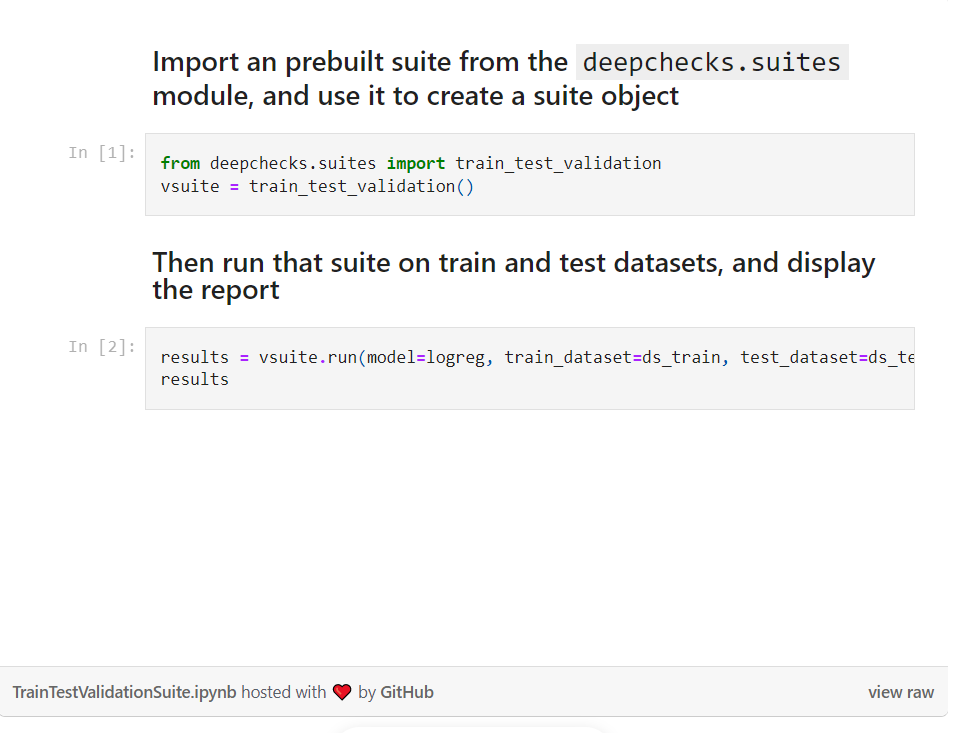

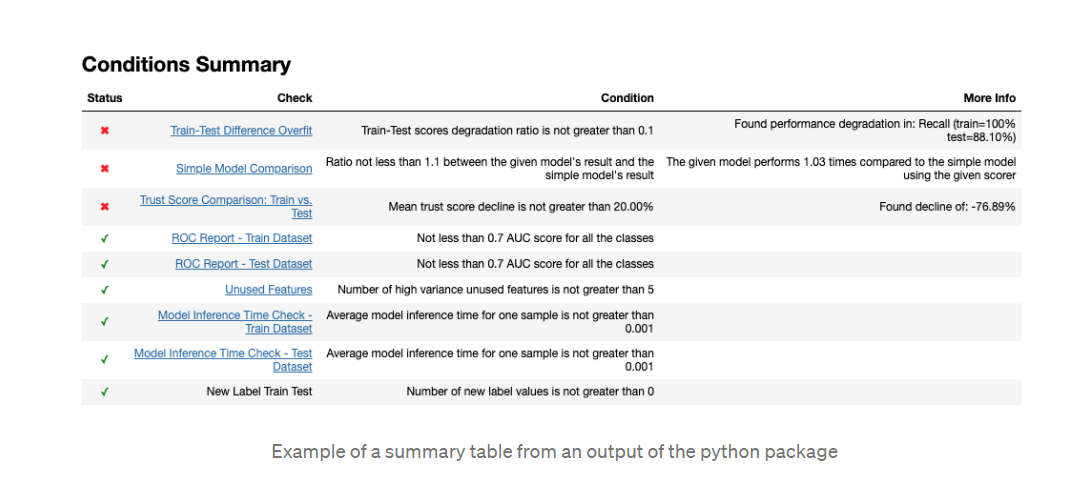

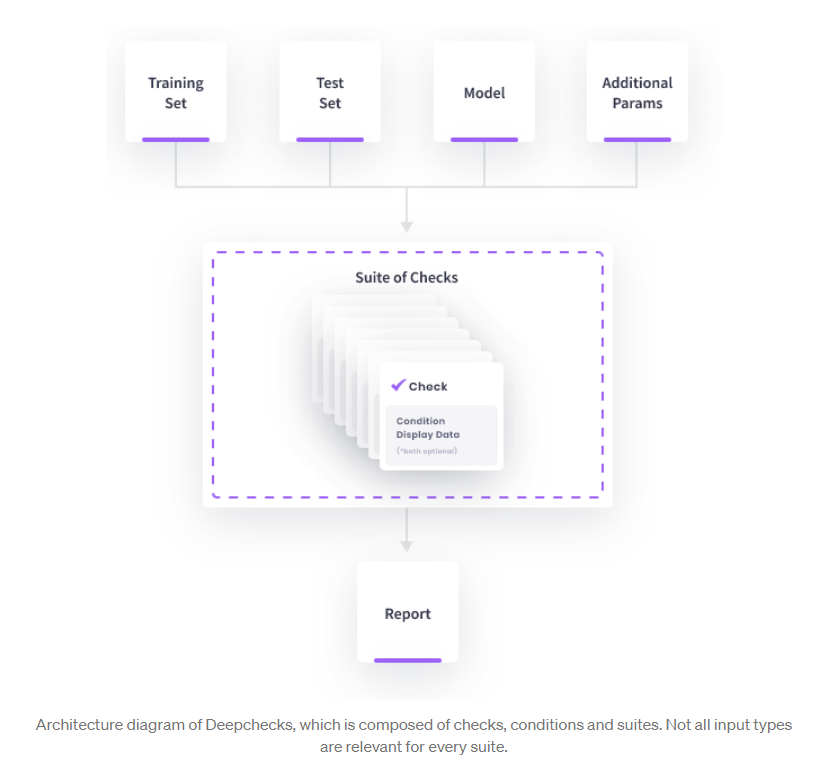

### Merhaba, sorum oldukça dengesiz bir veri setine uyguladığım SMOTE tekniği ile ilgili. SMOTE sadece eğitim setinde uygulandığından, modelim daha iyi performans göstermesine rağmen başarısız bir 'Train Test Prediction Drift' testi çıkıyor. Birisi daha iyi bir yaklaşım biliyor mu? Teşekkürler!


Hey Paula,
SMOTE kullanırken, tren ve test arasındaki tahmin dağılımlarını karşılaştırdığından ve SMOTE trendeki doğal dağılımı manipüle ettiğinden, "Tren Testi Tahmini Kayması" kontrolünün başarısız olması normaldir.
SMOTE'dan önce orijinal veriler üzerinde bu kontrolü çalıştırmak dışında şu anda bir çözüm düşünemiyorum.



Cevap verdiğin için teşekkürler, Matan! Evet, SMOTE'dan önce Train-Test Validation Suite'i çalıştırıyorum. Ancak, Modelin daha iyi bir performans elde etmesi için SMOTE'a ihtiyacım olduğu için onu Değerlendirme Paketine dahil ettim. hatayı anladım yinede teşekkürler



SMOTE'a karşı koymak için prediction drift check'e sınıf ağırlıkları girişi eklemek mümkün olabilir, github deposunda bizim için bir konu açmak ister misiniz? (düzenlendi)https://github.com/deepchecks/deepchecks/issues

In [11]:
data_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


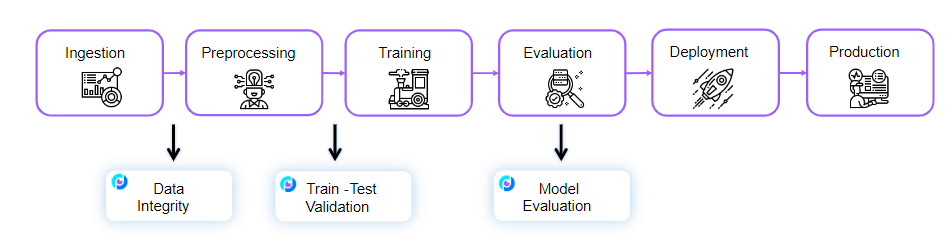

Dikkat edilmesi gereken tek şey, CV desteğinin ayrıca Pytorch'u da gerektirmesidir, bu da ayrı olarak yüklemeniz gerekir.

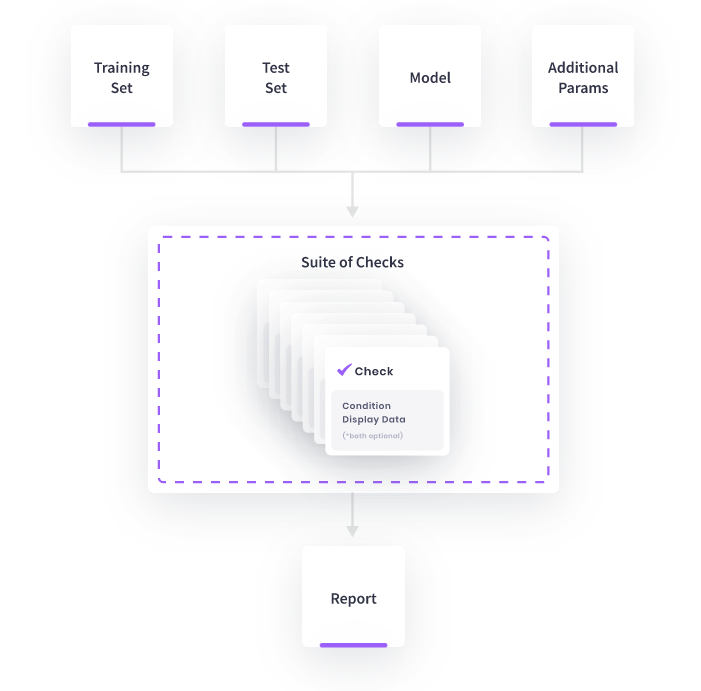

## Deepcheck'leri etkin bir şekilde kullanmak için anlamanız gereken üç farklı paradigma vardır:


                        Checks

                        Conditions

                        Suites 
                        

In [14]:
from deepchecks.tabular.suites import single_dataset_integrity
result = single_dataset_integrity().run(data_df)
result

C:\ProgramData\Anaconda3\lib\site-packages\deepchecks\tabular\suites\default_suites.py:47: DeprecationWarning:

the single_dataset_integrity suite is deprecated, use the data_integrity suite instead

deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 1 categorical features were inferred.: Class


Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_6QUKA1WDA5JGZE12M484A3Y4V">Data I…

## bize büyük bir zaman kazandırıyor modelleme sırasında veya sonrasında bunları fark etmemi

## Data pre-processing and data validation